In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [45]:
salla_url = ("https://raw.githubusercontent.com/Mini-project-Team-Theta/team_theta/refs/heads/main/final/salla_df.csv")
df = pd.read_csv(salla_url)
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Salla parish,2004,1,1,2004-01-01,33.0,-25.7,8.0,0.2
1,Salla parish,2004,1,2,2004-01-02,35.0,-16.2,7.0,-0.2
2,Salla parish,2004,1,3,2004-01-03,35.0,-19.2,5.0,0.3
3,Salla parish,2004,1,4,2004-01-04,35.0,-14.6,8.0,-0.4
4,Salla parish,2004,1,5,2004-01-05,35.0,-13.7,7.0,-1.0


In [46]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)
df.head()

,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2],day_of_year
0,2004,1,1,2004-01-01,33.0,-25.7,8.0,0.2,1
1,2004,1,2,2004-01-02,35.0,-16.2,7.0,-0.2,2
2,2004,1,3,2004-01-03,35.0,-19.2,5.0,0.3,3
3,2004,1,4,2004-01-04,35.0,-14.6,8.0,-0.4,4
4,2004,1,5,2004-01-05,35.0,-13.7,7.0,-1.0,5


In [47]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [48]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [49]:
loaded_model = joblib.load('pyha_snow_depth_predictor.pkl')

In [50]:
predictions = loaded_model.predict(X)

In [51]:
predictions

array([92.83741163, 76.92400535, 81.77354013, ...,  4.36239517,
       11.04219797,  5.42409421], shape=(7563,))

In [52]:
y2024 = predictions[-365::10]
x2024 = X["day_of_year"][-365::10]
y2004 = predictions[:365:10]
x2004 = X["day_of_year"][:365:10]

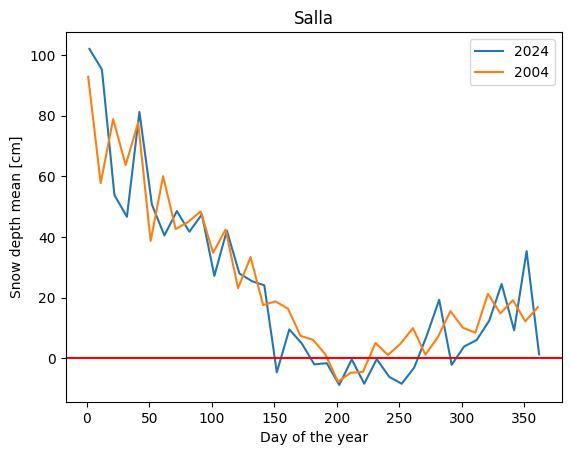

In [53]:
plt.plot(x2024, y2024, label= "2024")
plt.plot(x2004, y2004, label= "2004")
plt.title('Salla')
plt.legend()
plt.axhline(y=0, color="red")
plt.ylabel('Snow depth mean [cm]')
plt.xlabel('Day of the year')
plt.show()